In [ ]:
!pip install -q transformers datasets diffusers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import torch
from google.colab import userdata
from huggingface_hub import login
from transformers import pipeline
from diffusers import DiffusionPipeline
from datasets import load_dataset
import soundfile as sf
from IPython.display import Audio

In [ ]:
hf_token = userdata.get('HF_TOKEN')
login(hf_token, add_to_git_credential=True)

In [ ]:
# Sentiment Analysis
classifier = pipeline("sentiment-analysis", device="cuda")
result = classifier("I love working with Deep Learning models!")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


[{'label': 'POSITIVE', 'score': 0.9996092915534973}]


In [ ]:
# Named Entity Recognition (NER)
ner = pipeline("ner", grouped_entities=True, device="cuda")
result = ner("Gamal Abdel Nasser was the second president of Egypt.")
print(result)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda


[{'entity_group': 'PER', 'score': 0.99925, 'word': 'Gamal Abdel Nasser', 'start': 0, 'end': 18}, {'entity_group': 'LOC', 'score': 0.9996525, 'word': 'Egypt', 'start': 47, 'end': 52}]


In [ ]:
# Question Answering with Context
question_answerer = pipeline("question-answering", device="cuda")
result = question_answerer(question="Who was the second president of Egypt?", context="Gamal Abdel Nasser was the second president of Egypt.")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


{'score': 0.9888646602630615, 'start': 0, 'end': 18, 'answer': 'Gamal Abdel Nasser'}


In [ ]:
# Text Summarization
summarizer = pipeline("summarization", device="cuda")
text = """
The Hugging Face Transformers library is a highly versatile and powerful resource for natural language processing (NLP).
It enables users to tackle various tasks, including text classification, named entity recognition, and question answering.
This widely popular library is extensively utilized by the open-source data science community.
By offering a convenient and efficient way to work with transformer models, it significantly lowers the entry barriers for data scientists in the field.
"""
summary = summarizer(text, max_length=50, min_length=25, do_sample=False)
print(summary[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


 The Hugging Face Transformers library is a highly versatile and powerful resource for natural language processing . It enables users to tackle various tasks, including text classification, named entity recognition, and question answering .


In [ ]:
# Translation
translator = pipeline("translation_en_to_ar", model="NAMAA-Space/masrawy-english-to-egyptian-arabic-translator-v2.9", device="cuda")
result = translator("The Data Scientists were genuinely impressed by the simplicity and effectiveness of the Hugging Face pipeline API.")
print(result[0]['translation_text'])

config.json:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/957M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/806k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/916k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.21M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/74.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cuda


علماء البيانات انبهروا بجد ببساطه وفاعليه ابا خط الهاج فيس


In [ ]:
# Classification
classifier = pipeline("zero-shot-classification", device="cuda")
result = classifier("The Hugging Face's Transformers library is awesome!", candidate_labels=["technology", "art", "politics"])
print(result)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


{'sequence': "The Hugging Face's Transformers library is awesome!", 'labels': ['technology', 'art', 'politics'], 'scores': [0.57070392370224, 0.41849908232688904, 0.010797014459967613]}


In [ ]:
# Text Generation
generator = pipeline("text-generation", device="cuda")
result = generator("If there's one thing I want you to remember about using HuggingFace pipelines, it's")
print(result[0]['generated_text'])

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


If there's one thing I want you to remember about using HuggingFace pipelines, it's to do it in style to get everyone from a handful in the audience into your head. No more looking to talk smack or yell at another person in order


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

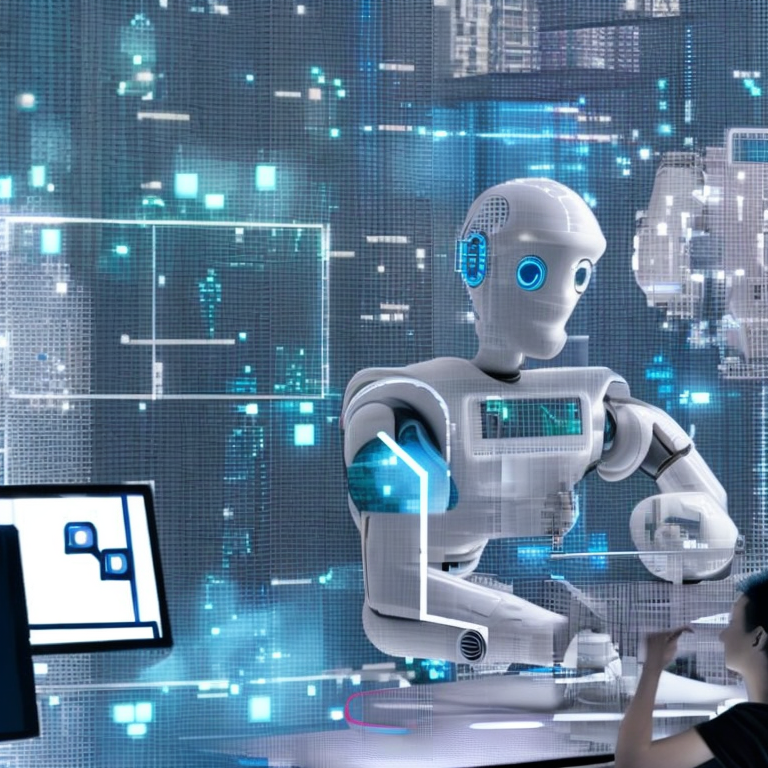

In [ ]:
# Image Generation
image_gen = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
    ).to("cuda")

text = "An AI robot coding on holographic screens in a futuristic office, as developers watch in concern, symbolizing AI replacing developers."
image = image_gen(prompt=text).images[0]
image

In [ ]:
# Audio Generation
synthesiser = pipeline("text-to-speech", "microsoft/speecht5_tts", device='cuda')

embeddings_dataset = load_dataset("Matthijs/cmu-arctic-xvectors", split="validation")
speaker_embedding = torch.tensor(embeddings_dataset[7306]["xvector"]).unsqueeze(0)

speech = synthesiser("Welcome to the artificial intelligence world!", forward_params={"speaker_embeddings": speaker_embedding})

sf.write("speech.wav", speech["audio"], samplerate=speech["sampling_rate"])
Audio("speech.wav")

Device set to use cuda
